 K-均值算法步骤： 首先随机创建k个质心，然后将每个点分配到最近的质心，在重新计算质心。这个过程重复数次，知道数据点的簇分配结果不再改变为止。

In [1]:
import numpy as np
from numpy import sqrt, power
import matplotlib.pyplot as plt

def loadfile(fileName,delimiter):
    '''载入文件，转换为矩阵（数组）'''
    outlist = []
    with open(fileName) as fr:
        for line in fr.readlines():
            s = line.strip().split(delimiter) # 以delimiter为分隔标志
            outlist.append(list(map(float,s)))# list(map(func,iter))才能读取到map()内存的数
    return np.array(outlist)

def dist(vecA, vecB):
    '''矢量A 和 矢量B的距离, 这里直接欧氏距离了'''
    return  sqrt(sum(power(vecA-vecB, 2))) # vecA 与 vecB 会对应元素相减, 结果会给出对应点的距离

def randcentre(data, k):
    '''从数据矩阵data中随机生成k个质心'''
    n = np.shape(data)[1] # 列的数目， 也就是数据的特征数目
    randcent = np.zeros([k, n]) # k个质心，一个坐标一行
    
    for i in range(n):
        Min = min(data[:,i])
        Max = max(data[:,i])
        Range = Max - Min
#         for j in range(k):
#             randcent[j,i] = Min + np.random.rand()* Range
        randcent[:,i] = (Min + np.random.rand(k,1)* Range).reshape(k)
    return randcent

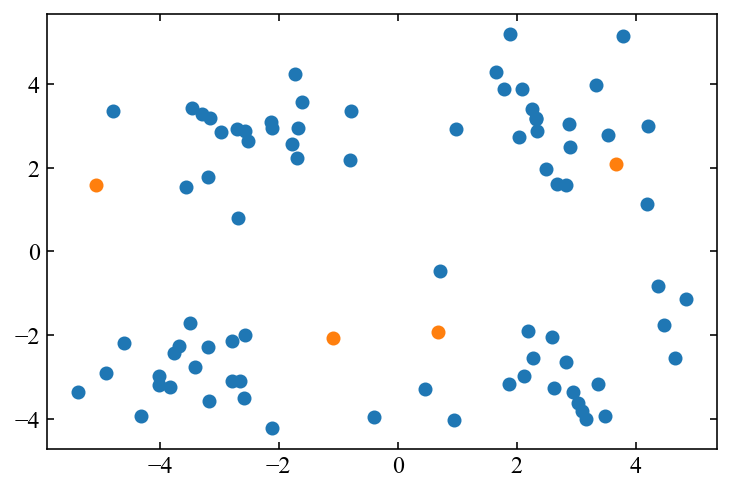

In [2]:
path = r'C:\Users\beidongjiedeguang\Documents\machinelearninginaction\Ch10'
fileName = path +'\\testSet.txt'

data = loadfile(fileName,'\t')

plt.scatter(data[:,0],data[:,1])

randcent = randcentre(data,4)
plt.scatter(randcent[:,0],randcent[:,1])
plt.show()

### kmean

In [501]:
def kmeans(data, k, dist=dist, creatCent=randcentre):
    '''K-mean 核心算法，接受4个参数
    返回所属类别subCenter以及聚类中心center'''
    count =0
    m, n = np.shape(data)       # m:样本个数  n:特征维数
    subcenter = np.zeros((m,2)) # 初始化所属类别,第一列储存类别，第2列储存相似度
    center = creatCent(data,k) # 初始化质心

    # 计算data中每一个点到center 的相似度（距离）：

    while 1:
        update = 0
        count += 1
        for i in range(m):
            minDist = np.inf
            for j in range(k):
                distance = dist(center[j,:],data[i,:])
                if distance < minDist:
                    minDist = distance
                    subIndex = j
            if subcenter[i,0] != subIndex: # 重要
                subcenter[i,:] = subIndex,minDist # 获得了一次subcenter
                update = 1

        # print(subcenter)
        if update ==0: 
            break
            
        # 更新质心
        for cent in range(k):
            center[cent,] = np.mean(data[np.nonzero(subcenter[:,0]==cent)[0]],axis=0) # 这里后文会有详细介绍
    print('count = ',count-1)
    return subcenter, center

count =  2


array([[-3.38237045, -2.9473363 ],
       [ 2.80293085, -2.7315146 ],
       [ 2.6265299 ,  3.10868015],
       [-2.46154315,  2.78737555]])

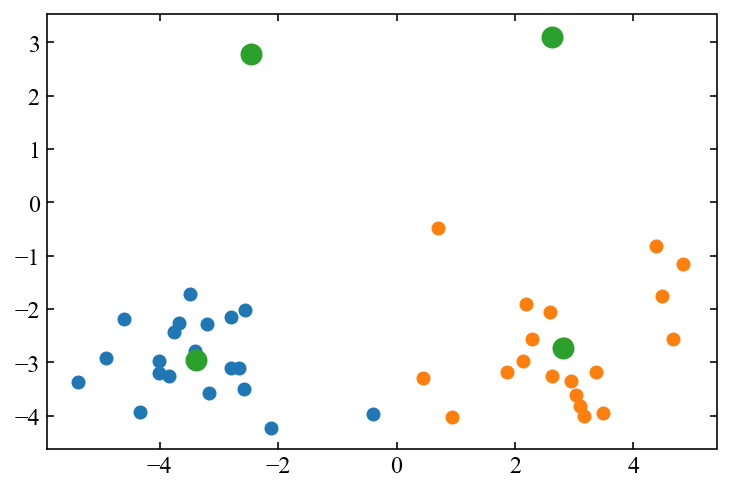

In [506]:
subcenter,center = kmeans(data, k=4)
center
for i in range(k):
    index = np.nonzero(subcenter[:,0]== i)
    plt.scatter(data[index,0],data[index,1])
    
plt.scatter(center[:,0],center[:,1],linewidths=5)
plt.show()

In [394]:
subcenter = np.random.randint(low=0,high=4,size=(10,2))
subcenter
subcenter[:,0]==0 # 对于随机生成一个二维数组来说，这样可以历遍值为0的元素，返回True / False
np.nonzero(subcenter[:,0]==0)
np.nonzero(subcenter[:,0]==0)[0] # 给出为True的索引

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 3],
       [2, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [3, 0],
       [0, 3]])

array([False, False, False,  True, False, False, False, False, False,
        True])

(array([3, 9], dtype=int64),)

array([3, 9], dtype=int64)

In [38]:
# 给出subcenter每一列的平均值, 也就是对所有行求平均
np.mean(subcenter,axis=0)

# 每一行的平均
np.mean(subcenter,axis=1)

array([0.6, 1.4])

array([1. , 1.5, 1. , 2.5, 0.5, 1. , 0.5, 0. , 0. , 2. ])

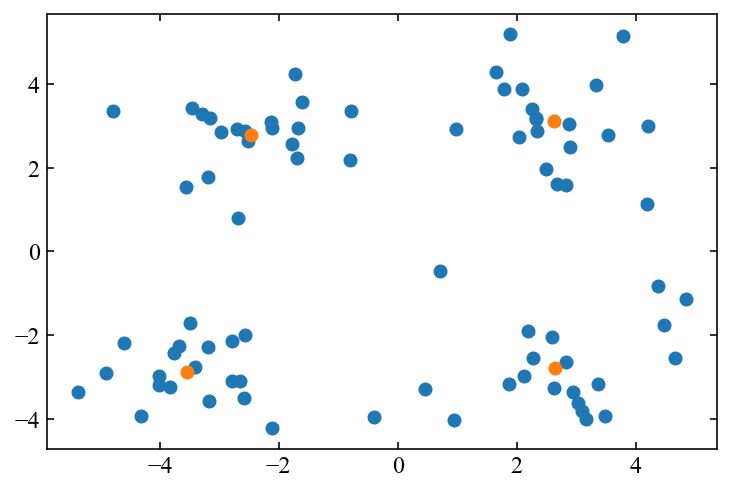

In [507]:
k=4
count =0
m, n = np.shape(data)       # m:样本个数  n:特征维数
subcenter = np.zeros((m,2)) # 初始化所属类别,第一列储存类别，第2列储存相似度
center = randcentre(data,k) # 初始化质心

# 计算data中每一个点到center 的相似度（距离）：
update = 1
while update:
    update = 0
    for i in range(m):
        minDist = np.inf
        for j in range(k):
            distance = dist(center[j,:],data[i,:])
            if distance < minDist:
                minDist = distance
                subIndex = j
        if subcenter[i,0] != subIndex: # 重要
            subcenter[i,:] = subIndex,minDist # 获得了一次subcenter
            update = 1
    # print(subcenter)

    # 更新质心
    for cent in range(k):
        center[cent,] = np.mean(data[np.nonzero(subcenter[:,0]==cent)],axis=0)

plt.scatter(data[:,0],data[:,1])
plt.scatter(center[:,0],center[:,1])
plt.show()

### 二分kmean

对于每一个簇  
* 计算总误差  
* 再给定的簇上面进行K-均值聚类(k=2)  
* 在计算该簇一份为二之后的总误差  

选择使得误差最小的那个簇进行划分操作

In [417]:
path = r'C:\Users\beidongjiedeguang\Documents\machinelearninginaction\Ch10'
fileName = path +'\\testSet.txt'
data = loadfile(fileName,'\t')

count =  7
the best center to split is: 0
the len of newSubcenter is:  80
count =  3
count =  2
the best center to split is: 1
the len of newSubcenter is:  40
count =  1
count =  2
count =  3
the best center to split is: 0
the len of newSubcenter is:  40


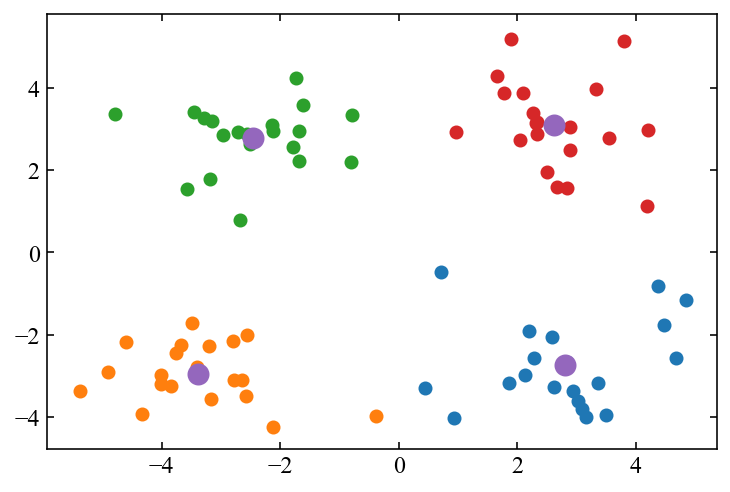

In [512]:
import copy
def biKmean(data,k,dist=dist):
    m = np.shape(data)[0]
    subcenter = np.zeros((m,2)) # 第一列储存类别，第二列储存相似度
    clustercenter = np.mean(data,axis=0) # 第一次聚类质心
    centerList = [clustercenter]
    # centerList
    for j in range(m):
        subcenter[j,1] = dist(clustercenter,data[j,:])**2 # 相似度/ 误差
    # subcenter

    while len(centerList)< k:
        lowersse =  np.inf
        for i in range(len(centerList)):
            currCluster = data[np.nonzero(subcenter[:,0]==i)[0],:]
        #     data
    #         currCluster
            splitSubcenter, center = kmeans(currCluster, 2)
            sseSplit = np.sum(splitSubcenter[:,1] **2)
            sseNotSplit = np.sum(subcenter[np.nonzero(subcenter[:,0] != i)[0],1]**2)
            # 选择使得误差最小的那个簇进行划分操作
            if (sseSplit + sseNotSplit) < lowersse:
                centToSplit = i
                newCenter = center
                newSubcenter = copy.deepcopy(splitSubcenter)
                lowersse = sseSplit + sseNotSplit

        newSubcenter[np.nonzero(newSubcenter[:,0] == 1)[0],0] =\
                                len(centerList)
        newSubcenter[np.nonzero(newSubcenter[:,0] == 0)[0],0] =\
                                centToSplit
        print('the best center to split is:',centToSplit)
        print('the len of newSubcenter is: ',len(newSubcenter))
    #     splitSubcenter

        centerList[centToSplit] = newCenter[0,:] # 我们将需要二分的那个簇替换为二分的一员
        centerList.append(newCenter[1,:])        # 再append 另一员 
        subcenter[np.nonzero(subcenter[:,0] == centToSplit)[0],:] = newSubcenter # 将需要二分的簇

    return centerList, subcenter
# centerList
# for cent in centerList:
#     plt.scatter(cent[0],cent[1],linewidths=5)
# plt.scatter(data[:,0],data[:,1])

centerList, subcenter = biKmean(data,k=4,dist=dist)
center = np.array(centerList)
for i in range(k):
    index = np.nonzero(subcenter[:,0]== i)
    plt.scatter(data[index,0],data[index,1])
    
plt.scatter(center[:,0],center[:,1],linewidths=5)
plt.show()

多次重复运行程序，可以看到，二分kmean算法并不是很理想，有时候并不能找出理想的聚类中心。


### kmean++
该算法再聚类中心的初始化状态过程中的基本原则是使得初始的聚类中心之间的距离尽可能远，这样可以避免出现聚类中心选择不好导致的kmean算法的糟糕的结果。  
步骤：
> * 在数据集中随机选择一个样本作为第一个初始化的聚类中心。  
* 选择出其余的聚类中心:  
 计算样本中的每一个样本点与已经初始化的聚类中心之间的距离，并选择其中最短的距离，集为$d_i$  
 以概率选择距离最大的样本最为新的聚类中心，重复上述过程，知道k个聚类中心都被确定。
* 对k个初始化的聚类中心，利用kmean算法计算最终的聚类中心。


In [513]:
def distance(vecA, vecB):
    '''矢量A 和 矢量B的距离, 这里直接欧氏距离了'''
    return sqrt(sum(power(vecA-vecB, 2)))

def nearest(point, cluster_centers):
    '''计算point和cluster_centers之间的最小距离
    input:  point(mat):当前的样本点
            cluster_centers(mat):当前已经初始化的聚类中心
    output: min_dist(float):点point和当前的聚类中心之间的最短距离
    '''
    min_dist = np.inf
    m = np.shape(cluster_centers)[0]  # 当前已经初始化的聚类中心的个数
    for i in range(m):
        # 计算point与每个聚类中心之间的距离
        d = distance(point, cluster_centers[i,:])
        # 选择最短距离
        if d < min_dist:
            min_dist = d
    return min_dist

def get_centroids(points, k):
    '''KMeans++的初始化聚类中心的方法
    input:  points(mat):样本
            k(int):聚类中心的个数
    output: cluster_centers(mat):初始化后的聚类中心
    '''
    m, n = np.shape(points)
    cluster_centers = np.zeros((k , n))
    # 1、随机选择一个样本点为第一个聚类中心
    index = np.random.randint(0, m)
    cluster_centers[0,:] = np.copy(points[index,:])
    # 2、初始化一个距离的序列
    d = [0.0 for _ in range(m)]
 
    for i in range(1, k):
        sum_all = 0
        for j in range(m):
            # 3、对每一个样本找到最近的聚类中心点
            d[j] = nearest(points[j,:], cluster_centers[0:i,:])
            # 4、将所有的最短距离相加
            sum_all += d[j]
        # 5、取得sum_all之间的随机值
        sum_all *= np.random.rand()
        # 6、获得距离最远的样本点作为聚类中心点
        for j, di in enumerate(d):
            sum_all -= di
            if sum_all > 0:
                continue
            cluster_centers[i] = np.copy(points[j,:])
            break
    return cluster_centers


count =  1


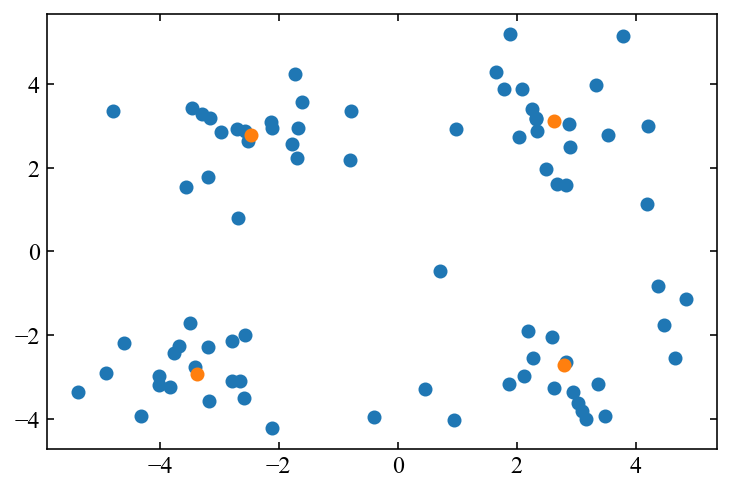

In [535]:
k = 4#聚类中心的个数
subcenter,center = kmeans(data, k,dist, creatCent=get_centroids)

plt.scatter(data[:,0],data[:,1])
plt.scatter(center[:,0],center[:,1])
plt.show()

### 考虑将这个kmean++的初始化思想用到bikmean中去：

count =  4
the best center to split is: 0
the len of newSubcenter is:  80
count =  1
count =  1
the best center to split is: 1
the len of newSubcenter is:  40
count =  2
count =  1
count =  1
the best center to split is: 2
the len of newSubcenter is:  19


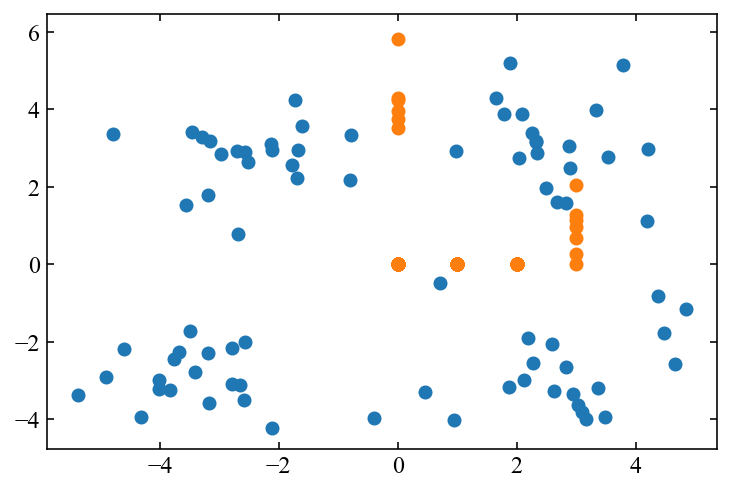

In [541]:
def BiKmean(data,k,dist=dist,creatCent=get_centroids):
    m = np.shape(data)[0]
    subcenter = np.zeros((m,2)) # 第一列储存类别，第二列储存相似度
    clustercenter = np.mean(data,axis=0) # 第一次聚类质心
    centerList = [clustercenter]
    # centerList
    for j in range(m):
        subcenter[j,1] = dist(clustercenter,data[j,:])**2 # 相似度/ 误差
    # subcenter

    while len(centerList)< k:
        lowersse =  np.inf
        for i in range(len(centerList)):
            currCluster = data[np.nonzero(subcenter[:,0]==i)[0],:]
        #     data
    #         currCluster

            # ----------------------------------------
            splitSubcenter, center = kmeans(currCluster, 2,dist,creatCent)
            sseSplit = np.sum(splitSubcenter[:,1] **2)
            sseNotSplit = np.sum(subcenter[np.nonzero(subcenter[:,0] != i)[0],1]**2)
            # 选择使得误差最小的那个簇进行划分操作
            if (sseSplit + sseNotSplit) < lowersse:
                centToSplit = i
                newCenter = center
                newSubcenter = copy.deepcopy(splitSubcenter)
                lowersse = sseSplit + sseNotSplit

        newSubcenter[np.nonzero(newSubcenter[:,0] == 1)[0],0] =\
                                len(centerList)
        newSubcenter[np.nonzero(newSubcenter[:,0] == 0)[0],0] =\
                                centToSplit
        print('the best center to split is:',centToSplit)
        print('the len of newSubcenter is: ',len(newSubcenter))
    #     splitSubcenter

        centerList[centToSplit] = newCenter[0,:] # 我们将需要二分的那个簇替换为二分的一员
        centerList.append(newCenter[1,:])        # 再append 另一员 
        subcenter[np.nonzero(subcenter[:,0] == centToSplit)[0],:] = newSubcenter # 将需要二分的簇

    return centerList, subcenter
k = 4#聚类中心的个数

subcenter,center = BiKmean(data,k,dist=dist,creatCent=get_centroids)

plt.scatter(data[:,0],data[:,1])
plt.scatter(center[:,0],center[:,1])
plt.show()

In [ ]:
嗯， 很失败， 不知问题出在哪儿了

### 使用sklean中的kmean

In [557]:
path = r'C:\Users\beidongjiedeguang\Documents\machinelearninginaction\Ch10'
fileName = path +'\\testSet2.txt'
data = loadfile(fileName,'\t')

(array([[-0.45965615, -2.7782156 ],
        [ 2.93386365,  3.12782785],
        [-2.94737575,  3.3263781 ]]),
 array([1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
        2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0]),
 106.749498761876)

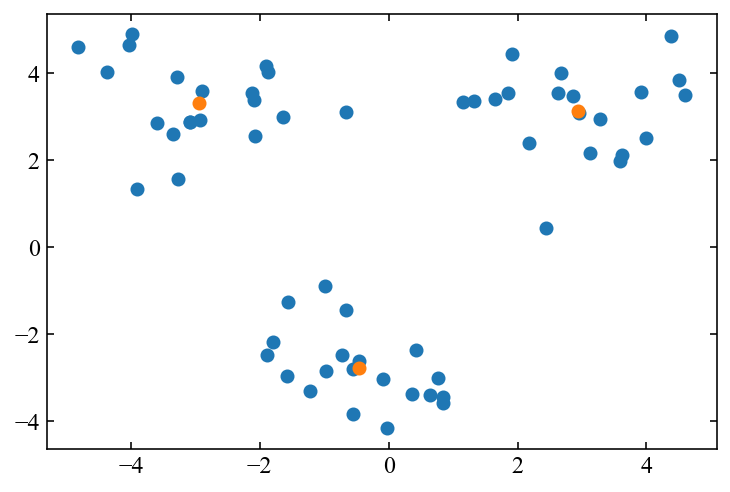

In [561]:
from sklearn.cluster import k_means 
res= k_means(data,3)
res
center = res[0]
#---------------------------------
plt.scatter(data[:,0],data[:,1])
plt.scatter(center[:,0],center[:,1])
plt.show()

还是人家写的好哇